In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
#Loading haberman data into pandas dataframe
column_names = ['Age', 'Operation_year', 'Auxillary_nodes', 'Status']
hbdata = pd.read_csv("E:\MLAssignments\haberman.csv", names = column_names)

In [4]:
#No. of data points and features:
print(hbdata.shape)

(306, 4)


In [5]:
#Columnns in the dataset
print(hbdata.columns)

Index(['Age', 'Operation_year', 'Auxillary_nodes', 'Status'], dtype='object')


In [6]:
#No of data points for each class (The ones who survive and ones who do not)
hbdata['Status'].value_counts()

1    225
2     81
Name: Status, dtype: int64

# __Observations:__
## There are two classes in this dataset(Unbalanced)
-  __Class 1__ belongs to the no of patients who survived even after 5 years : 225.<br>
-  __Class 2__ belongs to the number of patient who unfortunately don't make it within 5 years : 81.

# 2D Scatter Plot

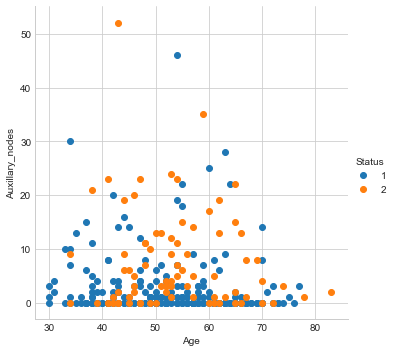

In [7]:
sb.set_style("whitegrid");
sb.FacetGrid(hbdata, hue = "Status", size = 5) \
  .map(plt.scatter, "Age", "Auxillary_nodes") \
  .add_legend();

plt.show();

# Observations
The number of patients are __denser__ at the bottom signifying that most of the patients have __zero__ auxillary nodes.

# Pair-Plot

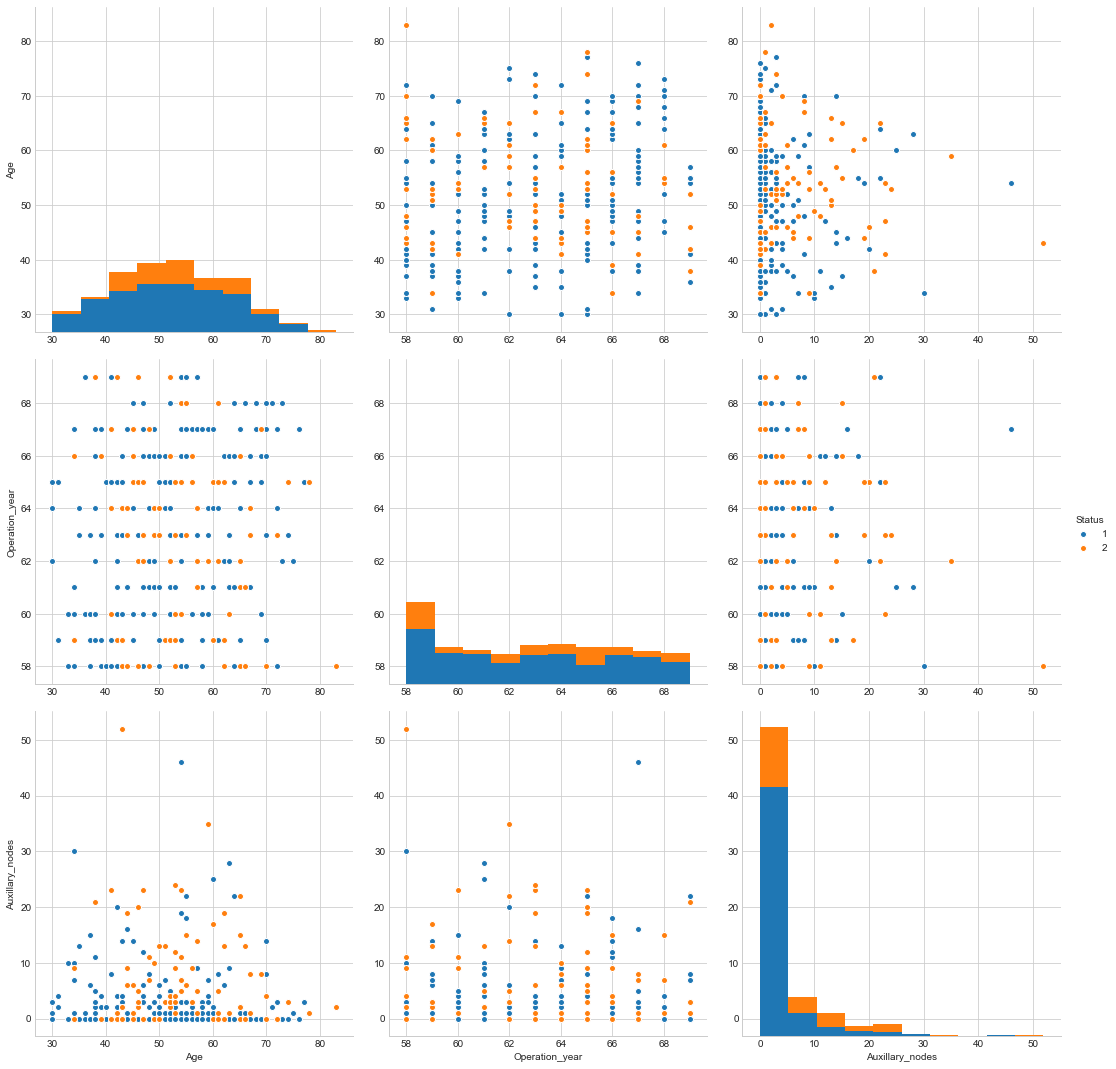

In [26]:
#Pair wise scatter-plot

plt.close();
sb.set_style("whitegrid");
sb.pairplot(hbdata, hue = "Status", vars = ["Age", "Operation_year", "Auxillary_nodes"], size = 5);
plt.show()

## Observations
- The distribution is pretty random but among these 'Age' and 'Auxillary nodes' are the most useful features to identify the survival status.



# Histogram, PDF, CDF

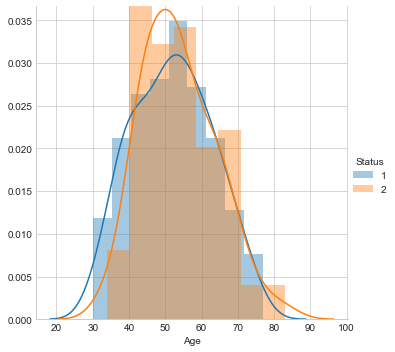

In [30]:
sb.FacetGrid(hbdata, hue = "Status", size = 5) \
  .map(sb.distplot, "Age") \
  .add_legend();

plt.show();

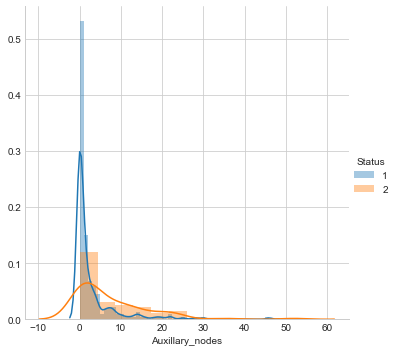

In [33]:
sb.FacetGrid(hbdata, hue = "Status", size = 5) \
  .map(sb.distplot, "Auxillary_nodes") \
  .add_legend();

plt.show();

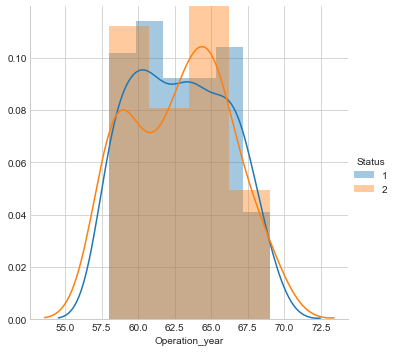

In [34]:
sb.FacetGrid(hbdata, hue = "Status", size = 5) \
  .map(sb.distplot, "Operation_year") \
  .add_legend();

plt.show();

## Observations
- The attributes __Age__ and __Operation_year__ dont give much details as there is a lot of __overlapping__ of data.
- The attribute __Auxillary_node__ on the other hand gives useful insights.We can observe that most of the patients have __zero__ positive auxillary nodes.

In [51]:
#There are two classes of Survival,ones who survive after 5 years(Class 1) and ones who did not(Class 2)
hb1 = hbdata.loc[hbdata["Status"] == 1]
hb2 = hbdata.loc[hbdata["Status"] == 2]


[ 0.73333333  0.10222222  0.02666667  0.05333333  0.01333333  0.00888889
  0.02222222  0.00444444  0.00888889  0.00888889  0.00444444  0.
  0.00444444  0.00444444  0.          0.          0.          0.          0.
  0.00444444]
[  0.    2.3   4.6   6.9   9.2  11.5  13.8  16.1  18.4  20.7  23.   25.3
  27.6  29.9  32.2  34.5  36.8  39.1  41.4  43.7  46. ]


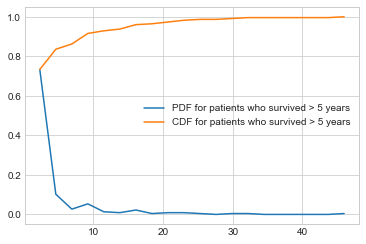

In [52]:
#Plotting PDF and CDF of Auxillary Nodes

counts, bin_edges = np.histogram(hb1["Auxillary_nodes"], bins = 20, density = True)
pdf = counts / (sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(['PDF for patients who survived > 5 years', 'CDF for patients who survived > 5 years'])

plt.show()


[ 0.39506173  0.17283951  0.0617284   0.08641975  0.04938272  0.08641975
  0.01234568  0.03703704  0.0617284   0.01234568  0.          0.          0.
  0.01234568  0.          0.          0.          0.          0.
  0.01234568]
[  0.    2.6   5.2   7.8  10.4  13.   15.6  18.2  20.8  23.4  26.   28.6
  31.2  33.8  36.4  39.   41.6  44.2  46.8  49.4  52. ]


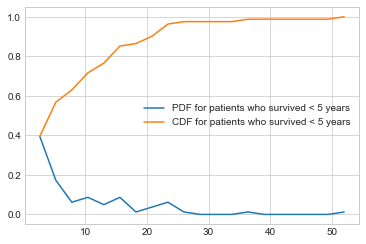

In [53]:
counts, bin_edges = np.histogram(hb2["Auxillary_nodes"], bins = 20, density = True)
pdf = counts / (sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(['PDF for patients who survived < 5 years', 'CDF for patients who survived < 5 years'])

plt.show()

# Box Plot

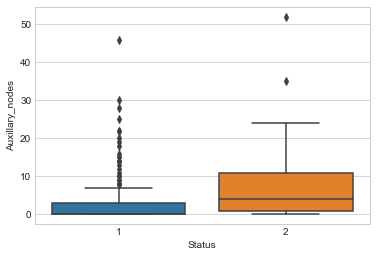

In [11]:
sb.boxplot(x = "Status", y = "Auxillary_nodes", data = hbdata)
plt.show()

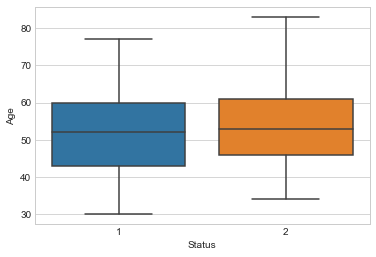

In [55]:
sb.boxplot(x = "Status", y = "Age", data = hbdata)

plt.show()

# Violin Plots

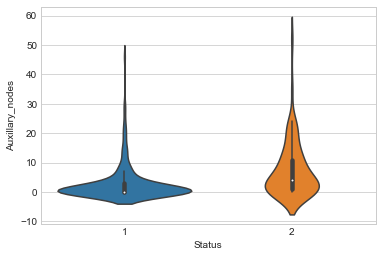

In [57]:
#Denser region of data are fatter and sparse ones are thinner

sb.violinplot(x = "Status", y = "Auxillary_nodes", data = hbdata, size = 10)

plt.show()

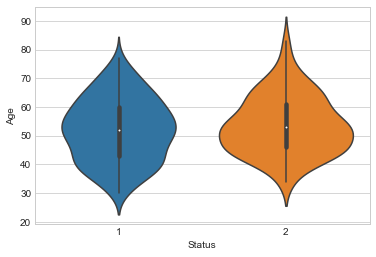

In [58]:
sb.violinplot(x = "Status", y = "Age", data = hbdata, size = 10)
plt.show()

# Contour Plot

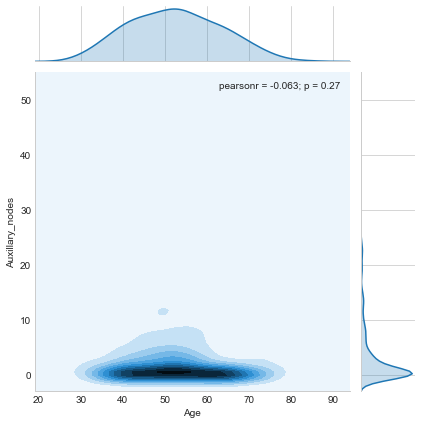

In [62]:
#2D Density plot, contors-plot
sb.jointplot(x="Age", y="Auxillary_nodes", data=hbdata, kind="kde");
plt.show();

# Conclusion
- The group of people in the __age group__ of __40-60__ had more positive auxillary nodes in comparison to other age groups,hence least chance of survival.

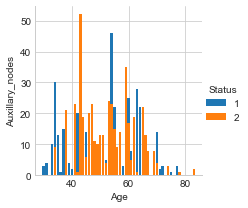

In [32]:
sb.set_style("whitegrid");
sb.FacetGrid(hbdata, hue = "Status") \
  .map(plt.bar, "Age", "Auxillary_nodes") \
  .add_legend();

plt.show();
